In [3]:
import perceval as pcvl
import numpy as np
import matplotlib.pyplot as plt
import itertools
from Functions import *
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal
from tabulate import tabulate
from dataRead import xpRead

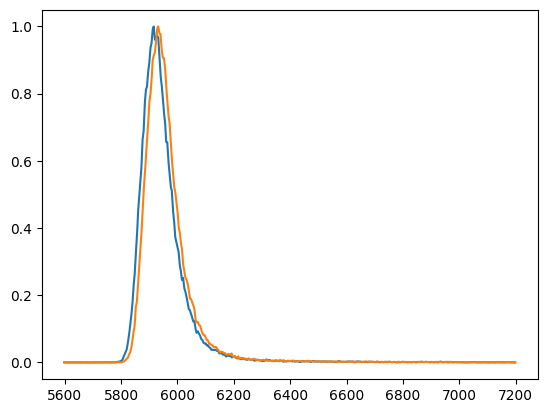

In [286]:
time, env1, env2,delay, table = xpRead('./acquired_data/xp_03/data.json')

extime = np.linspace(time[0],time[-1],100000,endpoint=False)

env1Interp = np.interp(extime,time,env1)
env2Interp = np.interp(extime,time,env2)
extime = extime[35000:45000]
env1Interp = env1Interp[35000:45000]
env2Interp = env2Interp[35000:45000]
plt.plot(extime,env1Interp)
plt.plot(extime,env2Interp)
idx1 = np.argmax(env1Interp)

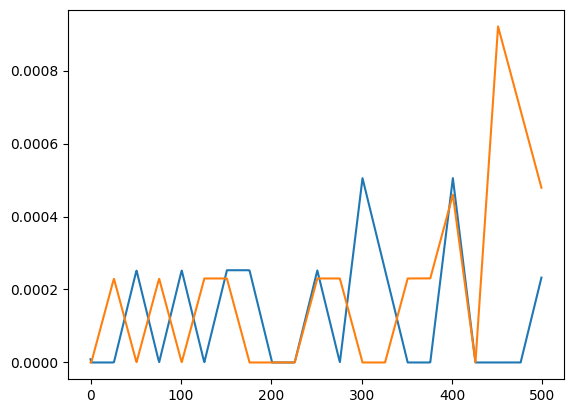

In [276]:
plt.plot(env1Interp[3500:4000])
plt.plot(env2Interp[3500:4000])

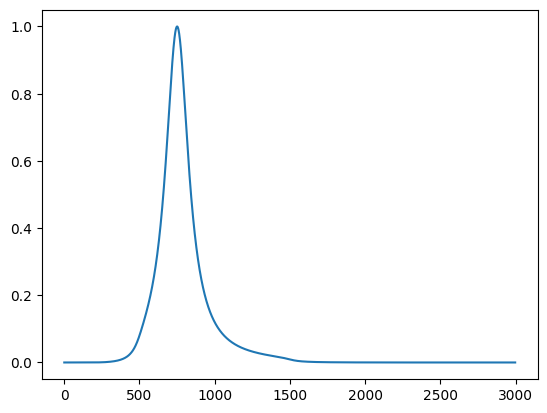

In [290]:
littleTime = np.linspace(0,200,1000,endpoint=False)
laserPulse1 = lorenztienne(littleTime,50,5)
laserPulse1 = laserPulse1/np.max(laserPulse1)
detector1 = lorenztienne(littleTime,50,9)
detector1 = detector1/np.max(detector1)
jitter1 = lorenztienne(littleTime,50,4.5)
jitter1 = jitter1/np.max(jitter1)

paddedLength = 10000
paddedlaserPulse1 = np.pad(laserPulse1,(0,paddedLength+len(extime)-len(littleTime)),'constant',constant_values=( 0))
paddeddetector1 = np.pad(detector1,(0,paddedLength+len(extime)-len(littleTime)),'constant',constant_values=( 0))
paddedjitter1 = np.pad(jitter1,(0,paddedLength+len(extime)-len(littleTime)),'constant',constant_values=( 0))
paddedenv1 = np.pad(env1Interp,(0,paddedLength),'constant',constant_values=( 0))

""" plt.plot(paddedlaserPulse1[0:50])
plt.plot(paddeddetector1[0:50])
plt.plot(paddedjitter1[0:50]) """

a = signal.convolve(laserPulse1,detector1,'full')
b = signal.convolve(a,jitter1,'full')
plt.plot(b/np.max(b))




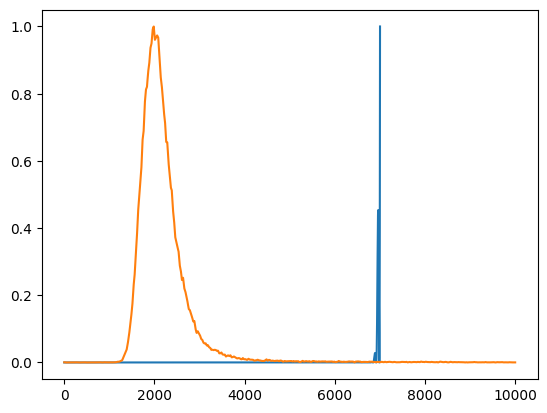

In [291]:
deconvolutedVal,_ = signal.deconvolve(env1Interp,b)

deconvolutedVal = deconvolutedVal**2

plt.plot((deconvolutedVal/np.max(deconvolutedVal)))
plt.plot(env1Interp)

In [266]:
print(np.min(deconvolutedVal))

-0.020067623976103212


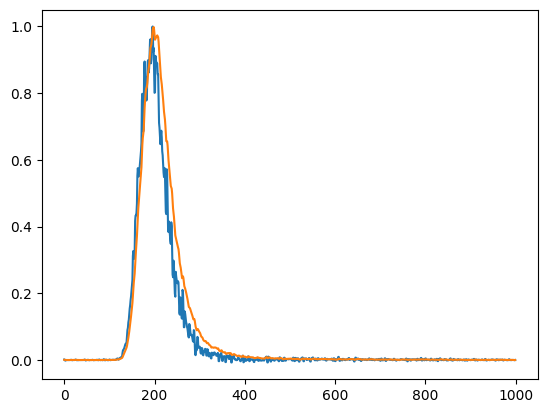

In [194]:
f_env1 = np.fft.rfft(paddedenv1)
f_laserPulse1 = np.fft.rfft(paddedlaserPulse1)
#f_detector1 = np.fft.rfft(paddeddetector1)
#f_jitter1 = np.fft.rfft(paddedjitter1)
r = f_env1 / (f_laserPulse1)

dk = np.fft.irfft(r)

plt.plot(dk[3500:4500]/np.max(dk))
plt.plot(env1Interp[3500:4500])

In [47]:
import numpy

h = [-8,-9,-3,-1,-6,7]
f = [-3,-6,-1,8,-6,3,-1,-9,-9,3,-2,5,2,-2,-7,-1]
g = [24,75,71,-34,3,22,-45,23,245,25,52,25,-67,-96,96,31,55,36,29,-43,-7]

# https://stackoverflow.com/questions/14267555/find-the-smallest-power-of-2-greater-than-n-in-python

def shift_bit_length(x):
    return 1<<(x-1).bit_length()

def conv(a, b):
    p = len(a)
    q = len(b)
    n = p + q - 1
    r = shift_bit_length(n)
    y = numpy.fft.ifft(numpy.fft.fft(a,r) * numpy.fft.fft(b,r),r)
    return numpy.trim_zeros(numpy.around(numpy.real(y),decimals=6))

def deconv(a, b):
    p = len(a)
    q = len(b)
    n = p - q + 1
    r = shift_bit_length(max(p, q))
    y = numpy.fft.ifft(numpy.fft.fft(a,r) / numpy.fft.fft(b,r), r)
    return numpy.trim_zeros(numpy.around(numpy.real(y),decimals=6))
    
# should return g
   
print(conv(h,f))

# should return h

print(deconv(g,f))

# should return f

print(deconv(g,h))

[ 24.  75.  71. -34.   3.  22. -45.  23. 245.  25.  52.  25. -67. -96.
  96.  31.  55.  36.  29. -43.  -7.]
[-8. -9. -3. -1. -6.  7.]
[-3. -6. -1.  8. -6.  3. -1. -9. -9.  3. -2.  5.  2. -2. -7. -1.]


In [109]:
time, env1, env2,delay, table = xpRead('./acquired_data/xp_03/data.json')

extime = np.linspace(time[0],time[-1],10000,endpoint=False)

env1Interp = np.interp(extime,time,env1)
env2Interp = np.interp(extime,time,env2)
extime = extime[3500:4500]
env1Interp = env1Interp[3500:4500]
env2Interp = env2Interp[3500:4500]
""" plt.plot(extime,env1Interp)
plt.plot(extime,env2Interp) """
idx1 = np.argmax(env1Interp)


littleTime = np.linspace(0,300,50,endpoint=False)
laserPulse = lorenztienne(littleTime,0,5)
laserPulse = laserPulse/np.max(laserPulse)
detector = lorenztienne(littleTime,0,9)
detector = detector/np.max(detector)
jitter = lorenztienne(littleTime,0,4.5)
jitter = jitter/np.max(jitter)

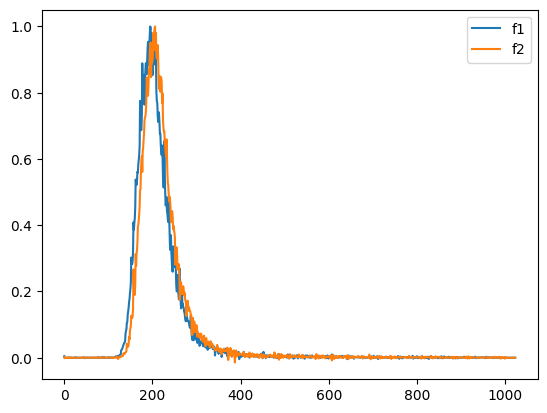

In [110]:
#f,_ = signal.deconvolve(env1Interp,laserPulse1)
hprime = conv(laserPulse,detector)
h = conv(hprime,jitter)
f1 = deconv(env1Interp,h)
f2 = deconv(env2Interp,h)

plt.plot(f1/np.max(f1),label = 'f1')
plt.plot(f2/np.max(f2),label = 'f2')
""" plt.plot(env1Interp,label = 'real1')
plt.plot(env2Interp,label = 'real2') """

plt.legend()

 ...]

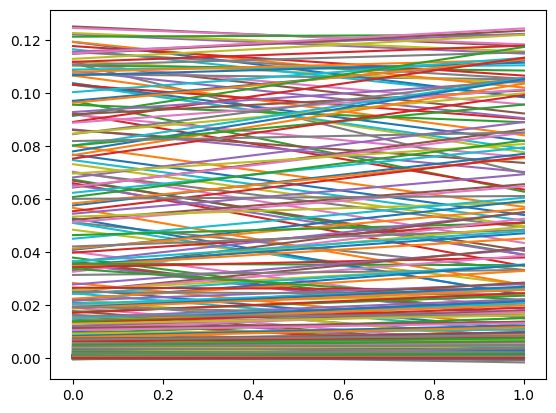

In [115]:
waves = np.c_[f1,f2]


